Import necessary things

In [133]:
from collision_sim import ParticleEnviroment
from particle_simulation import approximate_collisions
import pandas as pd
import numpy as np
import math


Create and run sim

In [134]:
run_time = 9
num_particles = 500
sigma = 2
length = 10

sim_enviroment = ParticleEnviroment(
    num_particles = num_particles,
    run_time = run_time,
    init_velocity = 'random',
    circle_radius = sigma,
    box_length = length
)

sim_enviroment.run_sim()

Sim complete total collisions: 207


calculate lambda as cross section of circle over free area

In [135]:
lmd = (2*sigma)/(length**2 - math.pi*sigma**2)

Plot sim results against expected from poisson

<Axes: >

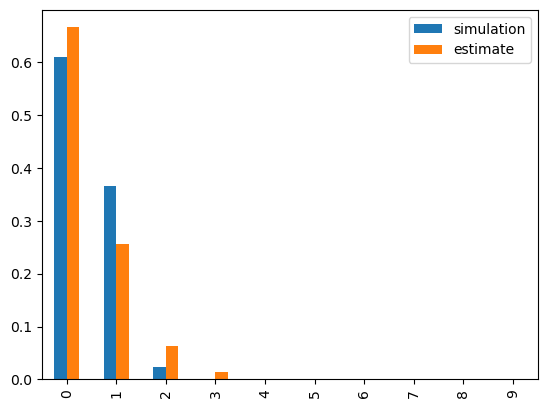

In [136]:
buckets = np.zeros(10)
for particle in sim_enviroment.particles.values():
    buckets[particle['number_collisions']] += 1

buckets /= num_particles
categories = np.arange(10)
buckets_approx = np.zeros(10)

collision_counts = approximate_collisions(
    num_particles = num_particles,
    lmb = lmd,
    tau = run_time
)

for i, _ in enumerate(collision_counts):
    buckets_approx[collision_counts[i]] += 1
buckets_approx /= num_particles

df = pd.DataFrame({'simulation': buckets})
df['estimate'] = buckets_approx

df.plot.bar()